<a href="https://colab.research.google.com/github/nahyun-song/pf_game/blob/main/project_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🕹Data Description
--------------------------
`Name` : 게임의 이름입니다.\
`Platform` : 게임이 지원되는 플랫폼의 이름입니다.\
`Year` : 게임이 출시된 연도입니다.\
`Genre` : 게임의 장르입니다.\
`Publisher` : 게임을 제작한 회사입니다.\
`NA_Sales` : 북미지역에서의 출고량입니다.\
`EU_Sales` : 유럽지역에서의 출고량입니다.\
`JP_Sales` : 일본지역에서의 출고량입니다.\
`Other_Sales` : 기타지역에서의 출고량입니다.

- 게임 관련 데이터를 분석하여 '다음 분기에 어떤 게임을 설계해야 할까'라는 질문에 답을 찾아보자

# 1. 데이터 전처리

In [6]:
#데이터 불러오기
import pandas as pd
df = pd.read_csv('https://url.kr/bemvwq')
df = df.drop(df.columns[0], axis=1)
df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [7]:
# 나라별 판매량 단위 통일하기
# M문자 제거
def dlt_M(string):
  return str(string.replace('M',''))

df['NA_Sales'] = df['NA_Sales'].apply(dlt_M)
df['EU_Sales'] = df['EU_Sales'].apply(dlt_M)
df['JP_Sales'] = df['JP_Sales'].apply(dlt_M)
df['Other_Sales'] = df['Other_Sales'].apply(dlt_M)

df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [8]:
# K 문자 제거 후 백만으로 단위 통일 & 나머지 sales데이터들도 float으로 type 변경
def dlt_K(string):
  return float(string.replace('K','')) / 1000

NK_data = df.loc[df['NA_Sales'].str.contains('K')]

NK_data = NK_data.copy()
NK_data['NA_Sales'] = NK_data['NA_Sales'].apply(dlt_K)  

df = df.drop(NK_data.index)
df['NA_Sales'] = df['NA_Sales'].astype('float64')
df = pd.concat([df,NK_data])

In [9]:
EK_data = df.loc[df['EU_Sales'].str.contains('K')]

EK_data = EK_data.copy()
EK_data['EU_Sales'] = EK_data['EU_Sales'].apply(dlt_K)

df = df.drop(EK_data.index)
df['EU_Sales'] = df['EU_Sales'].astype('float64')
df = pd.concat([df,EK_data])

In [10]:
JK_data = df.loc[df['JP_Sales'].str.contains('K')]

JK_data = JK_data.copy()
JK_data['JP_Sales'] = JK_data['JP_Sales'].apply(dlt_K)

df = df.drop(JK_data.index)
df['JP_Sales'] = df['JP_Sales'].astype('float64')
df = pd.concat([df,JK_data])

In [11]:
OK_data = df.loc[df['Other_Sales'].str.contains('K')]

OK_data = OK_data.copy()
OK_data['Other_Sales'] = OK_data['Other_Sales'].apply(dlt_K)

df = df.drop(OK_data.index)
df['Other_Sales'] = df['Other_Sales'].astype('float64')
df = pd.concat([df,OK_data])

In [12]:
df.head(15)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01


In [13]:
#연도데이터 정리
df_sub1 = df[(df['Year']<22)]
df = df.drop(df_sub1.index)

df_sub2 = df[(df['Year']<100)]
df = df.drop(df_sub2.index)

df_sub1['Year'] = df_sub1['Year'] + 2000
df_sub2['Year'] = df_sub2['Year'] + 1900

df = pd.concat([df, df_sub1, df_sub2])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
11334,Super Fire ProWrestling X,SNES,1995.0,Fighting,Human Entertainment,0.00,0.00,0.28,0.00
14572,S.C.A.R.S,PS,1998.0,Racing,Ubisoft,0.05,0.03,0.00,0.01
14785,GOTHA: Ismailia Seneki,SAT,1995.0,Strategy,Sega,0.00,0.00,0.08,0.00
15985,Sugoi Hebereke,SNES,1994.0,Fighting,Sunsoft,0.00,0.00,0.02,0.00


In [24]:
year = df['Year'].unique()
min(year), max(year)

(1980.0, 2020.0)

In [25]:
#연도를 10년 단위 연대로 나눔
#결측치는 모두 'Unknown' 으로 배정 -> 결측치를 0으로 채워 0~1980 구간에 포함되도록 함
df['Year'].fillna(0, inplace=True)

df['Year_cut'] = pd.cut(df['Year'], [0, 1980, 1990, 2000, 2010, 2022] , 
                         labels=['unknown', '1980s', '1990s', '2000s', '2010s~'], right= False , include_lowest= True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_cut
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,2000s
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,2000s
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,2010s~
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,2010s~
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,2010s~
...,...,...,...,...,...,...,...,...,...,...
11334,Super Fire ProWrestling X,SNES,1995.0,Fighting,Human Entertainment,0.00,0.00,0.28,0.00,1990s
14572,S.C.A.R.S,PS,1998.0,Racing,Ubisoft,0.05,0.03,0.00,0.01,1990s
14785,GOTHA: Ismailia Seneki,SAT,1995.0,Strategy,Sega,0.00,0.00,0.08,0.00,1990s
15985,Sugoi Hebereke,SNES,1994.0,Fighting,Sunsoft,0.00,0.00,0.02,0.00,1990s


In [26]:
# index정리하고 column별 type 확인
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         16598 non-null  object  
 1   Platform     16598 non-null  object  
 2   Year         16598 non-null  float64 
 3   Genre        16548 non-null  object  
 4   Publisher    16540 non-null  object  
 5   NA_Sales     16598 non-null  float64 
 6   EU_Sales     16598 non-null  float64 
 7   JP_Sales     16598 non-null  float64 
 8   Other_Sales  16598 non-null  float64 
 9   Year_cut     16598 non-null  category
dtypes: category(1), float64(5), object(4)
memory usage: 1.2+ MB


In [35]:
#결측치 확인
print(df.isnull().sum())
print('-------------------')
print('연도를 모르는 데이터의 비율')
print(df['Year_cut'].isin(['unknown']).value_counts(normalize=True))

Name            0
Platform        0
Year            0
Genre          50
Publisher      58
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Year_cut        0
dtype: int64
-------------------
연도를 모르는 데이터의 비율
False    0.983673
True     0.016327
Name: Year_cut, dtype: float64


# 2. 지역에 따라서 선호하는 게임 장르가 다를까

In [39]:
#지역별 시장규모 확인
g_scale = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
g_scale.sum()

NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64

In [37]:
import numpy as np
np.arange(len(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']))

array([0, 1, 2, 3])

<BarContainer object of 4 artists>

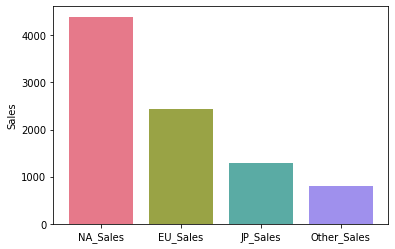

In [40]:
import numpy as np
import matplotlib.pyplot as plt

plt.xticks(np.arange(4),['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.ylabel('Sales')
plt.bar(np.arange(4),[4392.95, 2434.13, 1291.02, 797.75], label='Geo', color=['#E6798A', '#99A345', '#5AABA4', '#9F90ED'])

In [41]:
#지역에 따른 장르별 출고량 확인
#장르 카테고리에서 결측치를 포함한 행 50개 삭제
gGeo = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
gGeo = gGeo.dropna()
gGeo

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16593,Fighting,0.00,0.00,0.28,0.00
16594,Racing,0.05,0.03,0.00,0.01
16595,Strategy,0.00,0.00,0.08,0.00
16596,Fighting,0.00,0.00,0.02,0.00


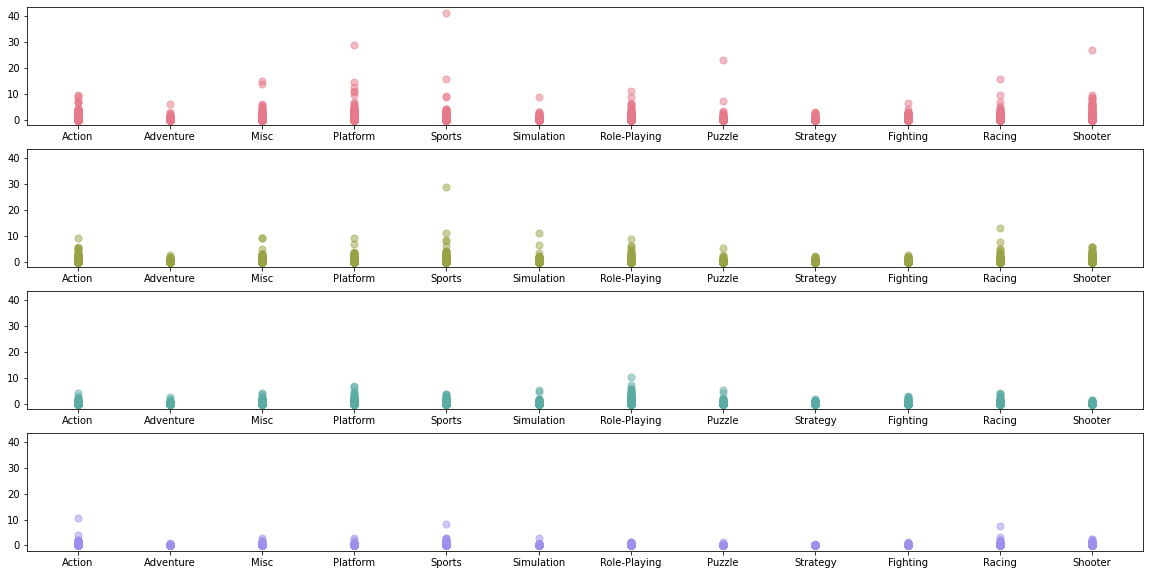

In [42]:
#scatter plot 으로 전체적인 데이터 확인
fig, axs = plt.subplots(4, 1, figsize=(20, 10), sharey=True)
axs[0].scatter(gGeo['Genre'], gGeo['NA_Sales'], s=50, c='#E6798A', alpha=0.5, label='NA_Sales')
axs[1].scatter(gGeo['Genre'], gGeo['EU_Sales'], s=50, c='#99A345', alpha=0.5, label='EU_Sales')
axs[2].scatter(gGeo['Genre'], gGeo['JP_Sales'], s=50, c='#5AABA4', alpha=0.5, label='JP_Sales')
axs[3].scatter(gGeo['Genre'], gGeo['Other_Sales'], s=50, c='#9F90ED', alpha=0.5, label='Other_Sales')

In [43]:
# 장르별 게임수 확인
gGeo['Genre'].value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

- 게임수가 많은 장르에서 출고량이 많을 것 -> 게임수가 가장 적은 장르를 기준으로 샘플 사이즈를 맞춰 분석해보자

In [44]:
def my_samp(i):
  u = gGeo['Genre'].unique()
  s = gGeo[gGeo['Genre'].isin([u[i]])].sample(570)
  return s

for i in range(12) :
  if i == 0 :
    s_gGeo = my_samp(0)
  else :
    s_gGeo = pd.concat([s_gGeo, my_samp(i)])

s_gGeo

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
247,Action,0.24,0.10,0.00,0.07
4814,Action,0.12,0.03,0.11,0.01
237,Action,0.08,0.01,0.01,0.01
11655,Action,0.54,0.88,0.00,0.22
2373,Action,0.00,0.00,0.27,0.00
...,...,...,...,...,...
4945,Shooter,0.17,0.04,0.00,0.00
16060,Shooter,0.29,0.20,0.00,0.03
2821,Shooter,0.00,0.03,0.00,0.01
4785,Shooter,0.04,0.02,0.00,0.01


In [46]:
#장르-지역별 출고량
s_gGeo = s_gGeo.groupby('Genre').sum()
s_gGeo

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,143.87,87.40,26.17,28.15
Adventure,43.35,27.11,22.16,7.63
Fighting,160.03,74.87,63.41,26.52
Misc,154.15,85.07,37.68,25.51
Platform,292.13,123.79,87.49,30.30
Puzzle,115.43,49.40,56.61,12.35
Racing,171.69,109.14,23.76,40.58
Role-Playing,117.62,63.13,150.24,21.74
Shooter,227.43,128.59,16.59,42.47


In [47]:
#chi square test 로 두 변수사이의 연관성 확인
from scipy.stats import chi2_contingency
chi2_contingency(s_gGeo, correction=False)[1]

4.81125981845664e-49

- p-value 값이 0.05보다 현저히 작으므로 귀무가설을 기각하고 대안가설 채택 -> 장르와 나라별 출고량 사이의 연관이 있다

####장르별로 크기가 570인 표본집단을 만들어 비교한 결과

전체 시장 크기 : 북미 > 유럽 > 일본 > 그 외\
출고량이 높은 장르 : platform, shooter, sports
일본 시장을 제외한 시장은 대부분 장르별 출고량 추이가 비슷하게 나타남 일본 시장은 타 시장과는 다르게\
롤플레잉에서 장르별 출고량이 현저히 높았고, 레이싱과 슈터에서는 낮았다.

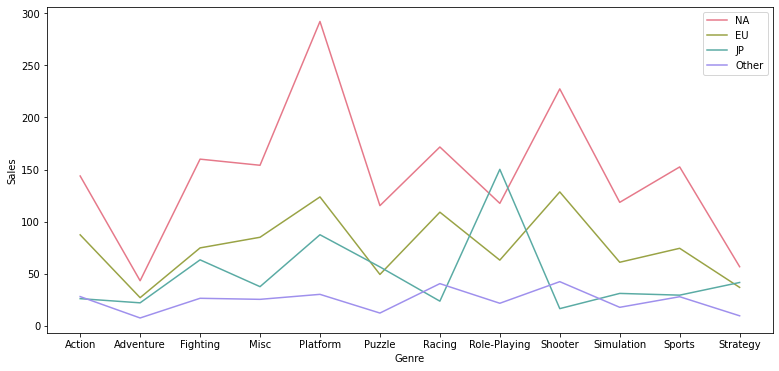

In [48]:
#line plot 으로 시각화
plt.figure(figsize=(13,6)) 


plt.xlabel('Genre')           
plt.ylabel('Sales')

plt.plot(s_gGeo['NA_Sales'], label='NA', c='#E6798A')
plt.plot(s_gGeo['EU_Sales'], label='EU', c='#99A345')
plt.plot(s_gGeo['JP_Sales'], label='JP', c='#5AABA4')
plt.plot(s_gGeo['Other_Sales'], label='Other', c='#9F90ED')



plt.legend(loc=1)

plt.show()